In [1]:
import warnings
warnings.filterwarnings('ignore')

## Environment setup

#### Importing packages

In [2]:
# Importing necessary data manipulation and viz libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

#### Reading data

In [3]:
# Reading the reddit posts
df = pd.read_csv('reddit_posts_2022_07_21-10_16_58_AM_no_duplicates_personnal_concatenated_clean.csv', index_col=0)

In [4]:
df

level_0  index                       _id all_awardings  \
0            0      0  62d6699037075c826c2d1c0b            []   
1            1      1  62d6699037075c826c2d1c0c            []   
2            2      2  62d6699037075c826c2d1c0d            []   
4            4      4  62d6699037075c826c2d1c0f            []   
5            5      5  62d6699037075c826c2d1c10            []   
...        ...    ...                       ...           ...   
26438    27208  27208  62d6bf9037075c826c2d8653            []   
26440    27210  27210  62d6bf9037075c826c2d8655            []   
26441    27211  27211  62d6bf9037075c826c2d8656            []   
26442    27212  27212  62d6bf9037075c826c2d8657            []   
26443    27213  27213  62d6bf9037075c826c2d8658            []   

      allow_live_comments                author  author_flair_css_class  \
0                     0.0              Nb827618                     NaN   
1                   False    TheChaosBringer993                     NaN   
2                   False        sunflower_1970                     NaN   
4                   False            goalan2112                     NaN   
5                   False           DarkHeros01                     NaN   
...                   ...                   ...                     ...   
26438                 0.0  Obvious-Explorer7211                     NaN   
26440                 0.0        Monkeyboogaloo                     NaN   
26441                 0.0  Apprehensive-Pay3364                     NaN   
26442                 0.0           Spiderweb12                     NaN   
26443                 0.0        Monkeyboogaloo                     NaN   

      author_flair_richtext author_flair_text author_flair_type  ...  \
0                        []               NaN              text  ...   
1                        []               NaN              text  ...   
2                        []               NaN              text  ...   
4                        []               NaN              text  ...   
5                        []               NaN              text  ...   
...                     ...               ...               ...  ...   
26438                    []               NaN              text  ...   
26440                    []               NaN              text  ...   
26441                    []               NaN              text  ...   
26442                    []               NaN              text  ...   
26443                    []               NaN              text  ...   

      discussion_type suggested_sort call_to_action category event_end  \
0                 NaN            NaN            NaN      NaN       NaN   
1                 NaN            NaN            NaN      NaN       NaN   
2                 NaN            NaN            NaN      NaN       NaN   
4                 NaN            NaN            NaN      NaN       NaN   
5                 NaN            NaN            NaN      NaN       NaN   
...               ...            ...            ...      ...       ...   
26438             NaN            NaN            NaN      NaN       NaN   
26440             NaN            NaN            NaN      NaN       NaN   
26441             NaN            NaN            NaN      NaN       NaN   
26442             NaN            NaN            NaN      NaN       NaN   
26443             NaN            NaN            NaN      NaN       NaN   

      event_is_live event_start  \
0               NaN         NaN   
1               NaN         NaN   
2               NaN         NaN   
4               NaN         NaN   
5               NaN         NaN   
...             ...         ...   
26438           NaN         NaN   
26440           NaN         NaN   
26441           NaN         NaN   
26442           NaN         NaN   
26443           NaN         NaN   

                                         titled_selftext  \
0      Post Covid gastrointestinal symptoms I got sic...   
1      Has anyone gotten worse

In [5]:
# Extracting the preprocessed posts
preprocessed_reddit_posts = df['long_covid_related_text_unstemmed_without_numbers'].to_list()

In [6]:
from nltk import TweetTokenizer

# Tokenizing the text from the posts (useful for stop words inspection and removal)
tt = TweetTokenizer()
tokenized_posts = [tt.tokenize(post) for post in preprocessed_reddit_posts]
# Flatening the list of tokens to make processing easier
tokenized_posts_flat = [word for post in tokenized_posts for word in post]

#### Defining Stop Words removal function

In [7]:
import nltk
from nltk.corpus import stopwords

# Defining stopwords removal function
def remove_stopwords(text, stop_words):
    return " ".join([word for word in text if word not in stop_words])

#### Importing utility clustering functions

In [8]:
# Using the clustering function from the utils folder to important utility functions

import sys
sys.path.append("../utils/clustering")

from kmeans import plot_elbow
from kmeans import mbkmeans_clusters

from clustering_viz import tsne_viz
from clustering_viz import create_wordcloud

### TF-IDF + KMEANS

In [9]:
clusters_range = (2, 200)

#### Stop words removal

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(preprocessed_reddit_posts)
# the shape of the array of vectors
X.shape

(20377, 22360)

In [11]:
# Checking the terms with the lowst inverse document frequency score
idf_dict = {}
for item in vectorizer.vocabulary_.items():
    idf_dict[item[0]] = vectorizer.idf_[item[1]]
idf_dict = {k: v for k, v in sorted(idf_dict.items(), key=lambda item: item[1])}
list(idf_dict.keys())

['covid',
 'symptom',
 'like',
 'feel',
 'month',
 'anyone',
 'day',
 'long',
 'back',
 'week',
 'time',
 'start',
 'since',
 'still',
 'pain',
 'think',
 'else',
 'help',
 'know',
 'issue',
 'fatigue',
 'brain',
 'really',
 'test',
 'experience',
 'better',
 'make',
 'would',
 'work',
 'try',
 'last',
 'cannot',
 'heart',
 'year',
 'could',
 'much',
 'normal',
 'doctor',
 'body',
 'fog',
 'chest',
 'bad',
 'first',
 'worse',
 'say',
 'felt',
 'post',
 'want',
 'ago',
 'never',
 'anxiety',
 'something',
 'anything',
 'lot',
 'around',
 'sleep',
 'every',
 'almost',
 'away',
 'recover',
 'blood',
 'find',
 'right',
 'life',
 'headache',
 'haul',
 'well',
 'sick',
 'breath',
 'feeling',
 'head',
 'tell',
 'able',
 'night',
 'positive',
 'need',
 'hour',
 'happen',
 'good',
 'use',
 'give',
 'longcovid',
 'deal',
 'notice',
 'infection',
 'wake',
 'today',
 'sure',
 'walk',
 'pretty',
 'lose',
 'mild',
 'sometimes',
 'end',
 'way',
 'ever',
 'everything',
 'weird',
 'keep',
 'muscle',
 'l

In [12]:
# Manually select and define the list of the custom stop words (csw)
csw = ['covid','symptom','like','feel','month','anyone','day','long','back','week','time','start','since','still','think','else','help','know','issue','really','test','experience','better','make','would','work','try','last','cannot','year','could','much','normal','doctor','bad','first','worse','say','felt','post','want','ago','never','something','anything','lot','around','every','almost','away','find','right','life','haul','well','sick','feeling','tell','able','positive','need','hour','happen','good','use','give','longcovid','deal','notice','infection','today','sure','pretty','mild','sometimes','end','way','ever','everything','weird','keep','little','people','problem','new','later','hard','look','nothing','stop','wonder','past','etc','bit','point','though','may','many','fine','hauler','without','cause','maybe','march','severe','leave','hi','always','couple','next','improve','similar','completely','second','everyone','full','health','finally','hope','worst','develop','due','negative','morning','change','mostly','constant','another','struggle','home','recently','suffer','might','anymore','actually','january','put','old','however','level','enough','relate','advice','become','light','stay','already','case','show','different','december','whole','far','clear','diagnose','kind','effect','early','part','believe','daily','supplement','extreme','healthy','result','probably','energy','guy','minute','return','crazy','talk','sense','left','short','someone','catch','story','ask','especially','hit','thought','yet','improvement','sensation','random','super','begin','slowly','april','check','stuff','worry','follow','yesterday','dose','usually','constantly','please','turn','job','extremely','possible','wait','currently','hey','barely','soon','anybody','family','call','great','half','basically','others','fully','longer','system','question','literally','best','horrible','wrong','least','care','appointment','hospital','let','treatment','figure','virus','november','shot','quite','hello','idea','increase','along','either','reason','share','terrible','pass','lh','continue','med','mind','type','medication','sound','mean','heavy','small','intense','decide','except','february','push','friend','prescribe','throughout','include','function','main','course','term','august','guess','late','break','slightly','july','several','flu','manage','within','sort','october','definitely','illness','awful','thanks','mid','trouble','hell','area','strange','shit','pre','moment','everyday','send','condition','general','suddenly','explain','understand','september','prior','remember','concern','initial','june','honestly','curious','often','bring','place','big','doc','twice','beginning','close','saw','describe','eventually','ok','multiple','episode','heal','top','treat','person','although','affect','thank','consider','slight','love','state','disease','male','visit','nearly','answer','worried','diagnosis','real','major','stick','overall','house','sudden','usual','sorry','nervous','medical','realize','mention','linger','progress']

In [13]:
# Extending the stop words list for posts
stop_words = stopwords.words('english')
stop_words.extend(csw)
# Removing the stop words
posts_without_stop_words = [remove_stopwords(post, stop_words) for post in tokenized_posts]
df['long_covid_text_without_stop_words'] = posts_without_stop_words
# Some posts become empty after stop words removal so they filtered out before further processing
non_empty_preprocessed_titled_text_df = df[df['long_covid_text_without_stop_words'].str.len() > 0]
non_empty_posts_without_stop_words = non_empty_preprocessed_titled_text_df['long_covid_text_without_stop_words']

In [14]:
len(non_empty_posts_without_stop_words)

20340

In [15]:
non_empty_preprocessed_titled_text_df

level_0  index                       _id all_awardings  \
0            0      0  62d6699037075c826c2d1c0b            []   
1            1      1  62d6699037075c826c2d1c0c            []   
2            2      2  62d6699037075c826c2d1c0d            []   
4            4      4  62d6699037075c826c2d1c0f            []   
5            5      5  62d6699037075c826c2d1c10            []   
...        ...    ...                       ...           ...   
26438    27208  27208  62d6bf9037075c826c2d8653            []   
26440    27210  27210  62d6bf9037075c826c2d8655            []   
26441    27211  27211  62d6bf9037075c826c2d8656            []   
26442    27212  27212  62d6bf9037075c826c2d8657            []   
26443    27213  27213  62d6bf9037075c826c2d8658            []   

      allow_live_comments                author  author_flair_css_class  \
0                     0.0              Nb827618                     NaN   
1                   False    TheChaosBringer993                     NaN   
2                   False        sunflower_1970                     NaN   
4                   False            goalan2112                     NaN   
5                   False           DarkHeros01                     NaN   
...                   ...                   ...                     ...   
26438                 0.0  Obvious-Explorer7211                     NaN   
26440                 0.0        Monkeyboogaloo                     NaN   
26441                 0.0  Apprehensive-Pay3364                     NaN   
26442                 0.0           Spiderweb12                     NaN   
26443                 0.0        Monkeyboogaloo                     NaN   

      author_flair_richtext author_flair_text author_flair_type  ...  \
0                        []               NaN              text  ...   
1                        []               NaN              text  ...   
2                        []               NaN              text  ...   
4                        []               NaN              text  ...   
5                        []               NaN              text  ...   
...                     ...               ...               ...  ...   
26438                    []               NaN              text  ...   
26440                    []               NaN              text  ...   
26441                    []               NaN              text  ...   
26442                    []               NaN              text  ...   
26443                    []               NaN              text  ...   

      suggested_sort call_to_action category event_end event_is_live  \
0                NaN            NaN      NaN       NaN           NaN   
1                NaN            NaN      NaN       NaN           NaN   
2                NaN            NaN      NaN       NaN           NaN   
4                NaN            NaN      NaN       NaN           NaN   
5                NaN            NaN      NaN       NaN           NaN   
...              ...            ...      ...       ...           ...   
26438            NaN            NaN      NaN       NaN           NaN   
26440            NaN            NaN      NaN       NaN           NaN   
26441            NaN            NaN      NaN       NaN           NaN   
26442            NaN            NaN      NaN       NaN           NaN   
26443            NaN            NaN      NaN       NaN           NaN   

      event_start                                    titled_selftext  \
0             NaN  Post Covid gastrointestinal symptoms I got sic...   
1             NaN  Has anyone gotten worse at 8 months? Have any ...   
2             NaN  Bit of an odd sexual question. A pretty person...   
4             NaN  Timeline I looked back at my records since i'v...   
5             NaN  Workout Intolerance ?  Plenty of times I’ve he...   
...           ...                                                ...   
26438         NaN  Recommendation for best OTC antihistamine for ...   
26440         NaN  

In [16]:
df['author'].nunique()

7560

### Running clustering for k between 2 and 200 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating new tf-idf vectors now that stop words have been removed 
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(non_empty_posts_without_stop_words)
# The shape changed from (20377, 22360) to (20340, 7048) after the removal of stop words
X.shape

(20340, 7048)

Optimal Value of K: 53
Corresponding Distortion Score: 18710.9482789826


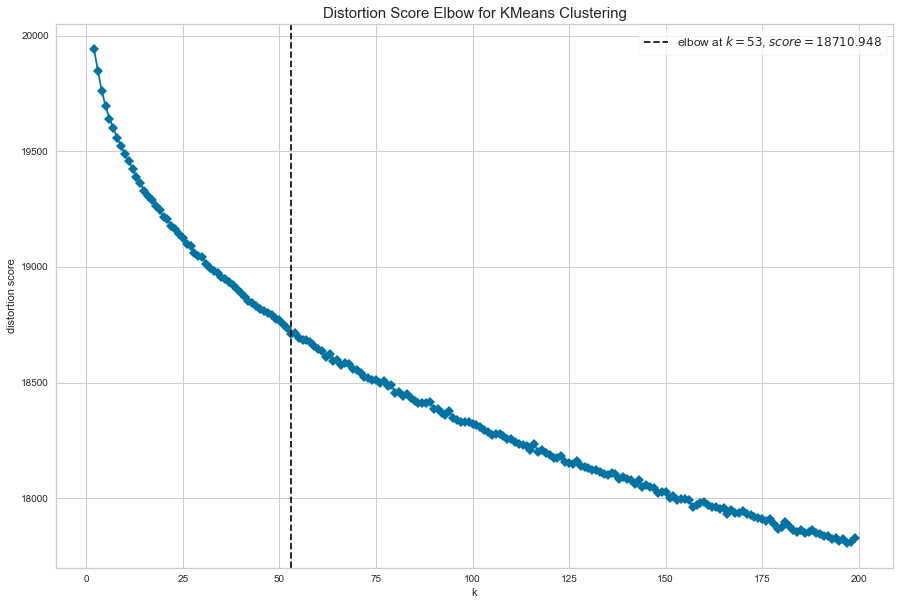

In [18]:
# Searching for the optimal K using the elbow method
plot_elbow(X, k_range=(2, 200))

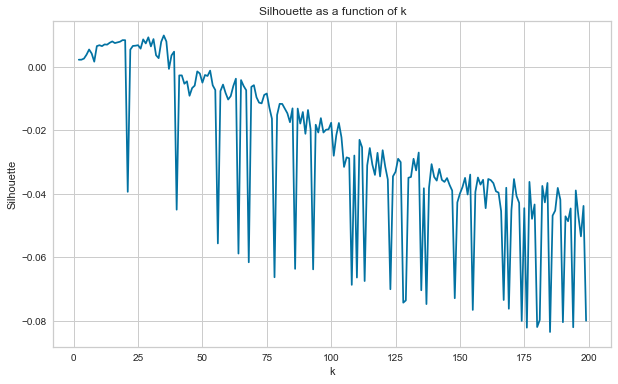

In [17]:
# Running Kmeans with different values of K between 2 and 200 and plotting the Silhouette as a function of K
mbkmeans_clusters(X, k_range=range(2,200))

In [18]:
# Running kmeans for a fixed value of K (35)
model, labels = mbkmeans_clusters(X, k_range=35)
# Creating dataframe where is Reddit post is assigned to their respective cluster
df_clusters = pd.DataFrame({
    "text": non_empty_posts_without_stop_words,
    "cluster": labels
})
df_clusters

Silhouette score:
0.009831685524536636


text  cluster
0      gastrointestinal hospitalize confirm align gi ...       17
1                                                 gotten       15
2      ejaculate pain radiate body intensely face ent...       14
4                                        timeline record       15
5      workout intolerance plenty hear difficulty wor...       23
...                                                  ...      ...
26438  recommendation otc antihistamine fatigue anxie...       15
26440  trial control antihistamine boost vitamin vita...       16
26441  suspect 44m 26th dizzy spell heart palpitation...       11
26442  personally physically limited side dramatic we...       14
26443  comment wife 10:30 sleep thump head ache enter...        8

[20340 rows x 2 columns]

In [19]:
# Reading the labels for the viz of the clusters with the appropriate labels
# categories_df = pd.read_csv('final_k_35_labels.csv')
# labels = categories_df['Main Label'].to_list()

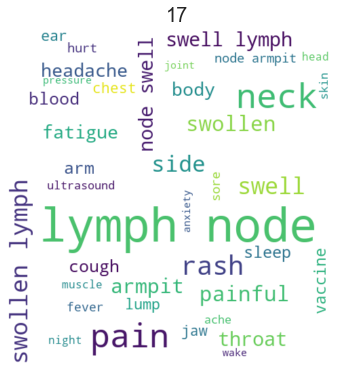

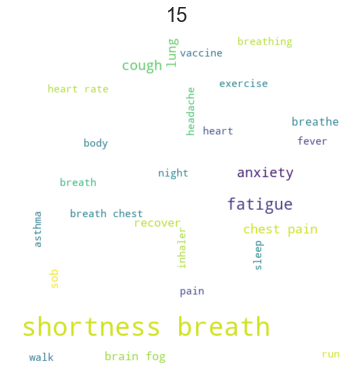

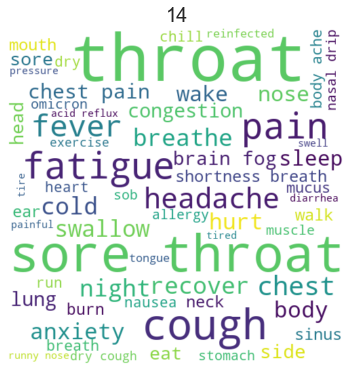

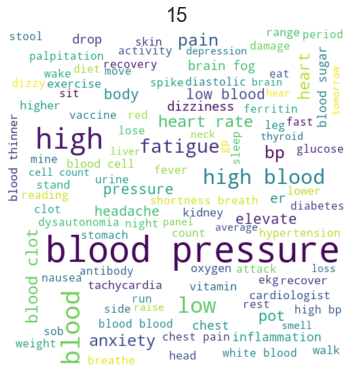

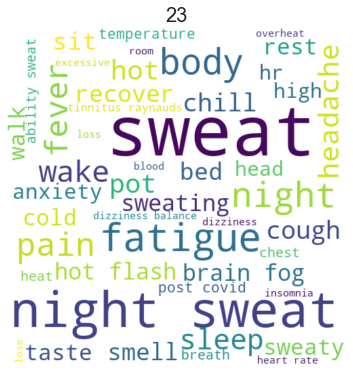

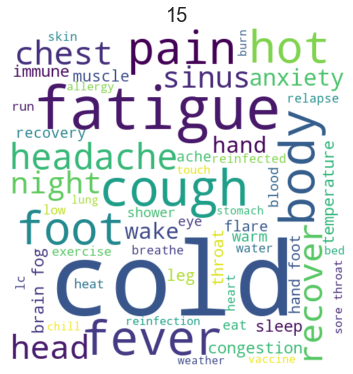

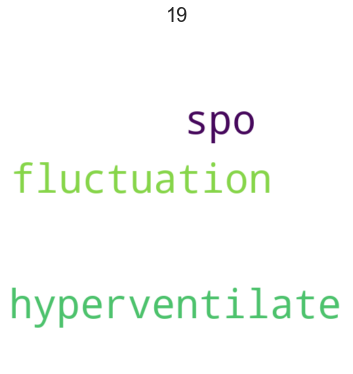

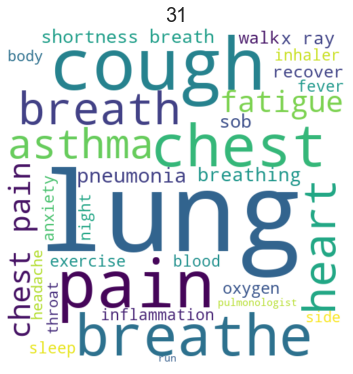

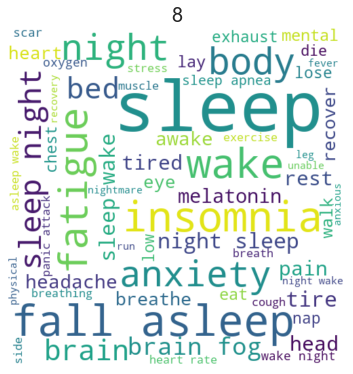

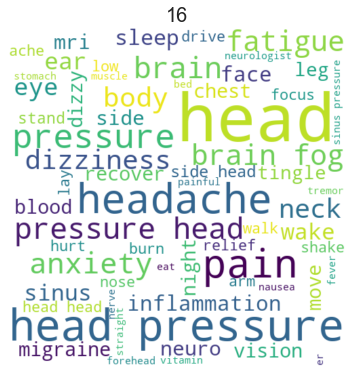

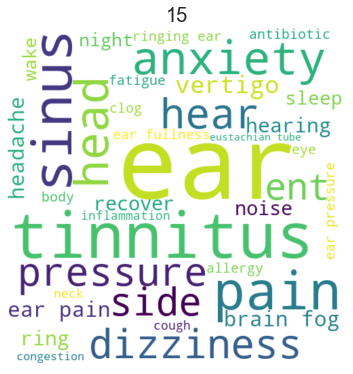

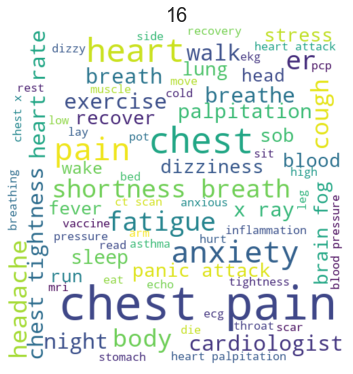

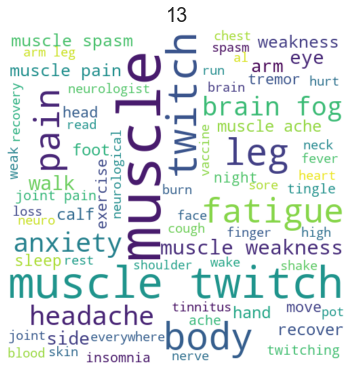

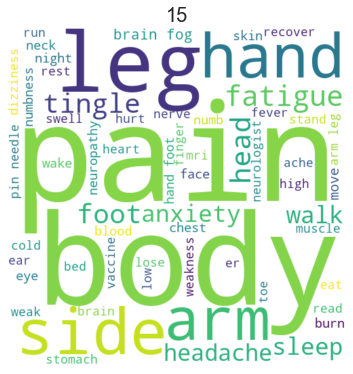

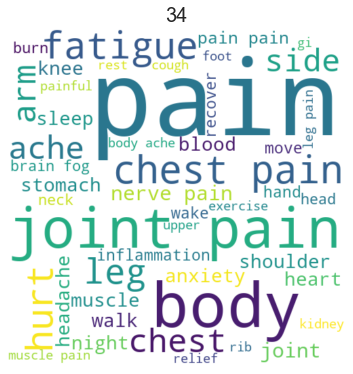

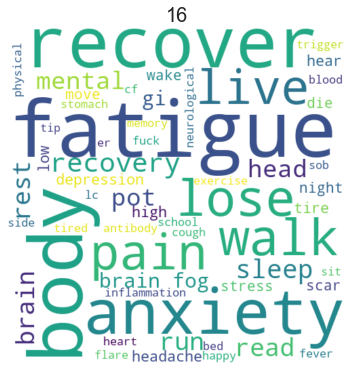

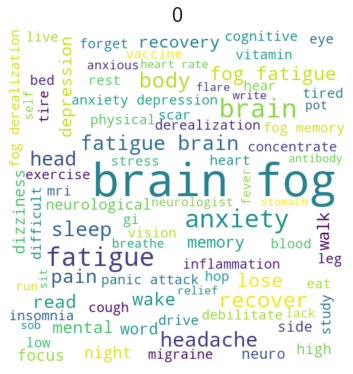

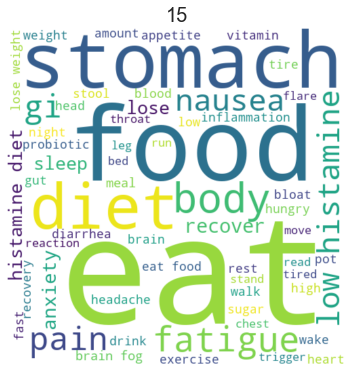

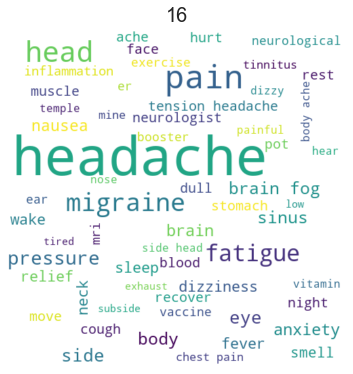

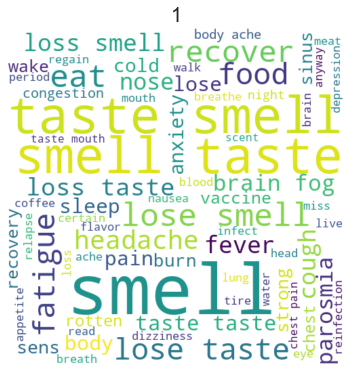

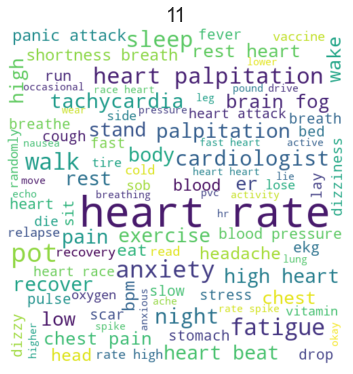

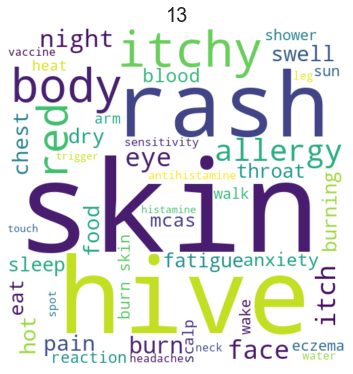

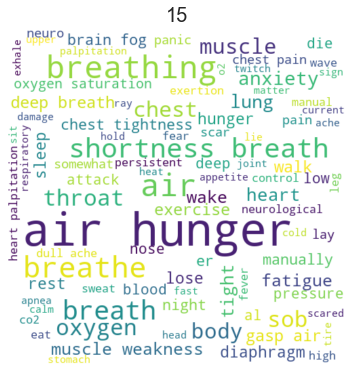

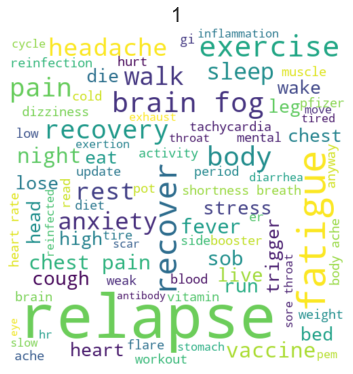

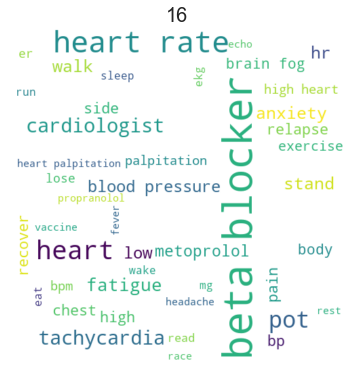

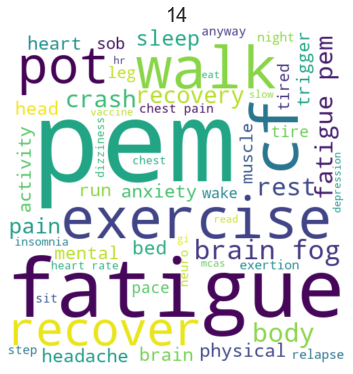

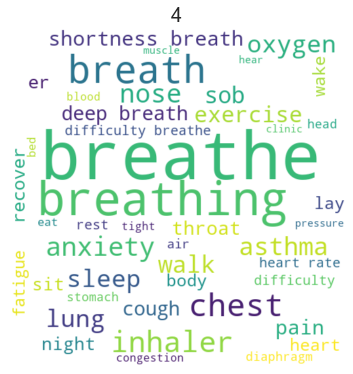

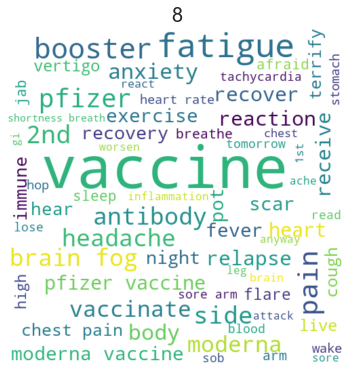

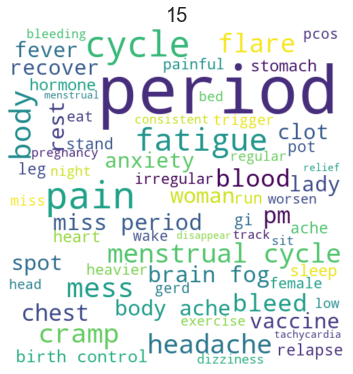

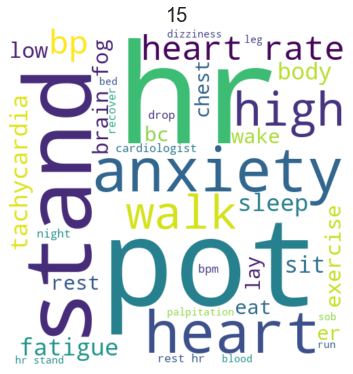

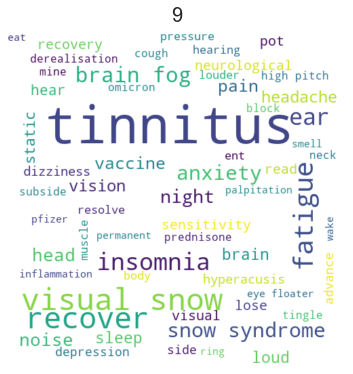

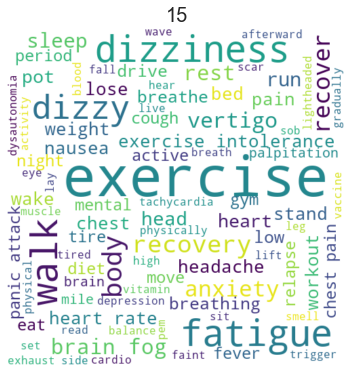

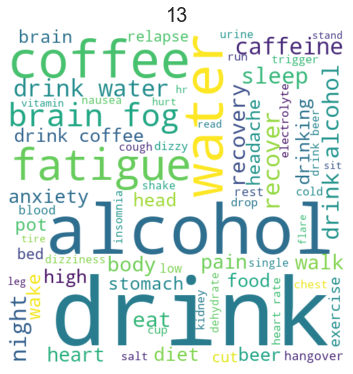

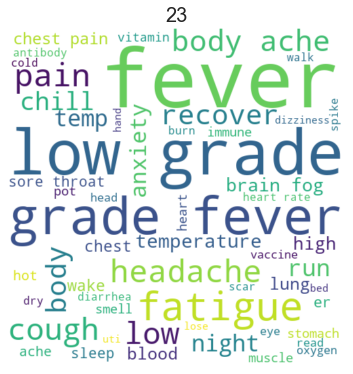

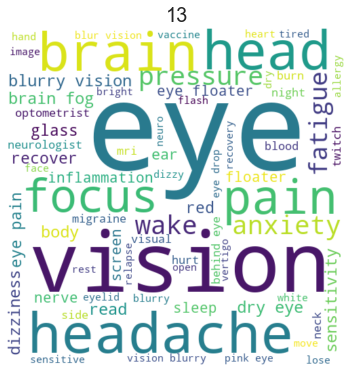

In [20]:
# Plotting the wordclouds for the different clusters
cluster_lengths = []
cluster_avg_words_count = []
for i in range(0, 35):
    cluster_lengths.append(len(df_clusters[df_clusters['cluster'] == i]))
    create_wordcloud(df_clusters[df_clusters['cluster'] == i]['text'].to_list(), title= labels[i])

In [21]:
# Some basic statistics on the obtained clusters
print("Average cluster size: " + str(np.mean(cluster_lengths)) + ", equals around " 
      + str(round(np.mean(cluster_lengths)/len(df) * 100)) + "% of the data")
print("Standard deviation: " + str(np.std(cluster_lengths)))
print("Sorted sizes of the clusters: " + str(sorted(cluster_lengths)))

Average cluster size: 581.1428571428571, equals around 3% of the data
Standard deviation: 933.8493957151502
Sorted sizes of the clusters: [1, 100, 125, 137, 152, 164, 165, 176, 208, 223, 233, 254, 268, 285, 305, 320, 341, 377, 415, 439, 441, 450, 469, 480, 515, 527, 630, 702, 739, 823, 876, 892, 968, 1389, 5751]


### Cluster labelling: reading the closest posts to each cluster center

In [22]:
# Computing distances between each cluster and their centroid and saving it in a dataframe
distance_df = pd.DataFrame(model.transform(X))
distance_df['cluster'] = labels
distance_df['centroid_distance'] = 0
for i in range(len(labels)):
    distance_df['centroid_distance'][i] =  distance_df[distance_df['cluster'][i]][i]

# combining the dataframe containing centroid distances with the one containing the text into a new dataframe
non_empty_preprocessed_titled_text_df['centroid_distance'] = distance_df['centroid_distance'].to_list()
non_empty_preprocessed_titled_text_df['cluster'] = distance_df['cluster'].to_list()
clustered_df = non_empty_preprocessed_titled_text_df[['index', '_id', 'title', 'selftext', 'titled_selftext', 'long_covid_related_text_unstemmed_without_numbers', 'long_covid_text_without_stop_words', 'cluster', 'centroid_distance']]
clustered_df[[ 'index', 'long_covid_text_without_stop_words', 'cluster', 'centroid_distance']]

index                 long_covid_text_without_stop_words  cluster  \
0          0  gastrointestinal hospitalize confirm align gi ...       17   
1          1                                             gotten       15   
2          2  ejaculate pain radiate body intensely face ent...       14   
4          4                                    timeline record       15   
5          5  workout intolerance plenty hear difficulty wor...       23   
...      ...                                                ...      ...   
26438  27208  recommendation otc antihistamine fatigue anxie...       15   
26440  27210  trial control antihistamine boost vitamin vita...       16   
26441  27211  suspect 44m 26th dizzy spell heart palpitation...       11   
26442  27212  personally physically limited side dramatic we...       14   
26443  27213  comment wife 10:30 sleep thump head ache enter...        8   

       centroid_distance  
0               0.996095  
1               1.002629  
2               0.989337  
4               1.002788  
5               0.933310  
...                  ...  
26438           0.992679  
26440           0.971651  
26441           0.966621  
26442           0.982989  
26443           0.995088  

[20340 rows x 4 columns]

In [23]:
# Creating a dataframe for the chosen cluster number
cluster_number = 15
cluster_df = clustered_df[clustered_df['cluster']==cluster_number].sort_values("centroid_distance")
# Looking at the closest posts to the cluster centroid
print('Cluster size: ' + str(len(cluster_df)))
cluster_df['long_covid_related_text_unstemmed_without_numbers'].to_list()[:100]

Cluster size: 5751


['zosyn pretty good really full course week hospital right',
 'test month initial infection normal help hell tnf-',
 'earworms anyone else deal severe earworms find anything help',
 'nofap symptom troll post like nofap sometimes 1-2 week increase energy level',
 'month still sick anybody still really sick month feel like onam literally symptom leave',
 'sensory overwhelm numbness possible experience rant thought think write chest since mind muddy foggy like almost everyone er time week parent worst point monitor hospital couple day mental breakdown know would turn vivid image death lose family worst fatigue ever find subreddit blessing curse around time diagnosis develop crippling health phobia paranoia cancer illness constantly monitor family walk around fear die moment imagine perfect time life hit shit lmao read story give anxiety start intrusive thought start apply make appreciate far many bad strong everyone make feel bad struggle much trigger fear say idea depression anxiety para

In [24]:
# Simple stats on the cluster
print('Cluster '+ str(cluster_number) +' size: ' + str(len(cluster_df)) + 
      ' making up ' + str(round((len(cluster_df) / len(df)) * 100, 1)) + '% of total data size')


Cluster 15 size: 5751 making up 28.2% of total data size


In [25]:
from nltk import bigrams
import itertools
import collections

# Isolating the posts for the fixed cluster number
tokenized_posts = [tt.tokenize(post) for post in cluster_df['long_covid_text_without_stop_words']]
tokenized_posts_flat = [word for post in tokenized_posts for word in post]
# Creating a list of word bigrams used in all of the posts
terms_bigram = [list(bigrams(post)) for post in tokenized_posts]
# Identifying the most frequent word bigrams in the cluster
bigrams = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigrams)
print('The 10 most used word bigrams:')
bigram_counts.most_common(10)

The 10 most used word bigrams:


[(('brain', 'fog'), 244),
 (('panic', 'attack'), 145),
 (('hair', 'loss'), 92),
 (('anxiety', 'depression'), 81),
 (('shortness', 'breath'), 76),
 (('body', 'ache'), 68),
 (('chest', 'pain'), 61),
 (('depression', 'anxiety'), 57),
 (('heart', 'rate'), 55),
 (('chronic', 'fatigue'), 53)]

In [26]:
print('The 10 most used words:')
collections.Counter(tokenized_posts_flat).most_common(10)

The 10 most used words:


[('fatigue', 995),
 ('anxiety', 949),
 ('body', 814),
 ('recover', 651),
 ('brain', 609),
 ('lose', 544),
 ('pain', 519),
 ('walk', 422),
 ('depression', 390),
 ('live', 374)]

In [27]:
# initialize the vectorizer
cluster_vectorizer = TfidfVectorizer(sublinear_tf=True)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X_cluster = cluster_vectorizer.fit_transform(cluster_df['long_covid_text_without_stop_words'].to_list())
cluster_idf_dict = {}
for item in cluster_vectorizer.vocabulary_.items():
    cluster_idf_dict[item[0]] = cluster_vectorizer.idf_[item[1]]
print('The top 10 words with lowest idf scores:')
[k for k, v in sorted(cluster_idf_dict.items(), key=lambda item: item[1])][:10]

The top 10 words with lowest idf scores:


['fatigue',
 'body',
 'anxiety',
 'recover',
 'brain',
 'pain',
 'lose',
 'walk',
 'live',
 'recovery']

### Cluster labeling: grouping clusters

In [28]:
# Reading the group labels given to each cluster
categories_df = pd.read_csv('final_k_35_labels.csv')
categories_df[['Cluster Number', 'Cluster Size', 'Main Label', 'Group Label']]

Cluster Number  Cluster Size  \
0                0           165   
1                1           527   
2                2           515   
3                3           480   
4                4           125   
5                5           305   
6                6             1   
7                7           450   
8                8           630   
9                9           439   
10              10           223   
11              11           823   
12              12           441   
13              13           876   
14              14           968   
15              15          5751   
16              16          1389   
17              17           702   
18              18           320   
19              19           739   
20              20           892   
21              21           137   
22              22           100   
23              23           469   
24              24           152   
25              25           268   
26              26           208   
27              27           415   
28              28           164   
29              29           254   
30              30           176   
31              31           377   
32              32           285   
33              33           233   
34              34           341   

                                           Main Label          Group Label  
0                                   Lymph Node Issues   Vascular/Lymphatic  
1                                 Shortness of Breath    Cardiorespiratory  
2                                         Sore Throat  Otorhinolaryngology  
3                                     Blood Pressure    Vascular/Lymphatic  
4                                         Night Sweat              General  
5                                            Coldness              General  
6                                           Unlabeled            Unlabeled  
7                                   Cardiorespiratory    Cardiorespiratory  
8                                               Sleep                Sleep  
9                         Headaches and Head Pressure  Neurological/Ocular  
10                                       Ear Problems  Otorhinolaryngology  
11                                   Chest Discomfort    Cardiorespiratory  
12                                      Muscle Twitch   Body Pain/Mobility  
13                                           Numbness   Body Pain/Mobility  
14                                               Pain   Body Pain/Mobility  
15                                     Mixed Symptoms       Mixed Symptoms  
16                                          Brain Fog  Neurological/Ocular  
17                                   Diet (histamine)     Gastrointestinal  
18                                Neurological Issues  Neurological/Ocular  
19                                   Smell/Taste Loss  Otorhinolaryngology  
20                                  Heart Rate Issues    Cardiorespiratory  
21                                   Cutaneous Issues            Cutaneous  
22                                         Air Hunger    Cardiorespiratory  
23                                   Relapse/Recovery     Relapse/Recovery  
24  Beta Blocker/\nPostural Orthostatic Tachycardi...    Cardiorespiratory  
25           Mixed Symptoms (Post-exertional malaise)    Symptoms Triggers  
26                                   Breathing Issues    Cardiorespiratory  
27                                            Vaccine              Vaccine  
28                             Menstrual Cycle Issues       Women's Health  
29                                  Heart Rate Issues    Cardiorespiratory  
30                        Tinnitus/Visual Snow Effect       Mixed Symptoms  
31              Mixed Symtpoms (Exercise intolerance)    Symptoms Triggers  
32  Mixed Symtpoms (Alcohol/ \nother drinks intole...    Symptoms Triggers  
33                                              Fever              General  
34          

In [29]:
# distribution of clusters amongst categories
categories_df['Group Label'].value_counts()

Cardiorespiratory      8
Neurological/Ocular    4
Otorhinolaryngology    3
General                3
Body Pain/Mobility     3
Symptoms Triggers      3
Vascular/Lymphatic     2
Mixed Symptoms         2
Unlabeled              1
Sleep                  1
Gastrointestinal       1
Cutaneous              1
Relapse/Recovery       1
Vaccine                1
Women's Health         1
Name: Group Label, dtype: int64

In [30]:
group_labels = list(categories_df['Group Label'].unique())
group_labels.remove('Unlabeled')
group_labels

['Vascular/Lymphatic',
 'Cardiorespiratory',
 'Otorhinolaryngology',
 'General',
 'Sleep',
 'Neurological/Ocular',
 'Body Pain/Mobility',
 'Mixed Symptoms',
 'Gastrointestinal',
 'Cutaneous',
 'Relapse/Recovery',
 'Symptoms Triggers',
 'Vaccine',
 "Women's Health"]

In [31]:
cluster_label_dict = dict(zip(categories_df.index.to_list(), categories_df['Group Label'].to_list()))
categorized_clustered_df = clustered_df
categorized_clustered_df['cluster_category'] = [cluster_label_dict[cluster] for cluster in clustered_df.cluster.to_list()] 

In [32]:
# Adding word count to help analysis
categorized_clustered_df['selftext_wordcount'] = [len(text.split()) for text in categorized_clustered_df['selftext']]

In [33]:
# Adding the extracted lexicon symptoms and symptom categories for later further analysis
import json
# we read the list of extracted symptoms lists from the Reddit posts
with open("extracted_lexicon_symptoms_from_long_covid_phrases_in_posts", "r") as fp:
    extracted_symptoms_lexicon = json.load(fp)
with open("extracted_symptoms_categories_from_long_covid_phrases_in_posts", "r") as fp:
    extracted_symptoms_categories = json.load(fp)
df['extracted_symptoms_lexicon'] = extracted_symptoms_lexicon
df['extracted_symptoms_categories'] = extracted_symptoms_categories

# mapping our clusters dataframe to the original df to extract the lexicon symptoms and symptom categories
categorized_clustered_df['extracted_symptoms_lexicon'] = df[df['index'].isin(categorized_clustered_df['index'].to_list())]['extracted_symptoms_lexicon']
categorized_clustered_df['extracted_symptoms_categories'] = df[df['index'].isin(categorized_clustered_df['index'].to_list())]['extracted_symptoms_categories']
categorized_clustered_df['extracted_symptoms_lexicon'] = categorized_clustered_df['extracted_symptoms_lexicon'].replace(np.nan, '')
categorized_clustered_df['extracted_symptoms_categories'] = categorized_clustered_df['extracted_symptoms_categories'].replace(np.nan, '')


In [34]:
# Resetting index to be able to map the selected posts to their previously established TF-IDF vectors
categorized_clustered_df.reset_index(inplace=True)

In [35]:
from sklearn.manifold import TSNE
import plotly.express as px

In [59]:
# Selecting the symptom groups (only excluding the unlabeled cluster)
symptom_groups = ['Vascular/Lymphatic', 'Cardiorespiratory','Otorhinolaryngology', 'General', 'Sleep','Neurological/Ocular','Gastrointestinal', 'Cutaneous',"Women's Health", 'Body Pain/Mobility', 'Mixed Symptoms', 'Relapse/Recovery', 'Symptoms Triggers', 'Vaccine']
#symptom_groups = ['Vascular/Lymphatic', 'Cardiorespiratory','Otorhinolaryngology', 'General', 'Sleep','Neurological/Ocular','Gastrointestinal', 'Cutaneous',"Women's Health", 'Body Pain/Mobility']
sub_df_clusters = categorized_clustered_df[categorized_clustered_df.cluster_category.isin(symptom_groups)]
symptoms_groups_index_list = sub_df_clusters.index.to_list()

In [60]:
X[symptoms_groups_index_list]

<20339x7048 sparse matrix of type '<class 'numpy.float64'>'
	with 445253 stored elements in Compressed Sparse Row format>

In [61]:
pd.DataFrame.sparse.from_spmatrix(X[symptoms_groups_index_list])

0     1     2     3     4     5     6     7     8         9     ...  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  ...   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  ...   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  ...   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  ...   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...       ...  ...   
20334   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  ...   
20335   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  ...   
20336   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  ...   
20337   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  ...   
20338   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.293899  ...   

       7038  7039  7040  7041  7042  7043  7044  7045  7046  7047  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
20334   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20335   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20336   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20337   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20338   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[20339 rows x 7048 columns]

In [62]:
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(X[symptoms_groups_index_list], )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=sub_df_clusters.cluster_category, color_discrete_sequence=px.colors.sequential.Viridis, labels={'color': 'cluster_category'}
)
fig.update_traces(marker_size=2)
fig.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

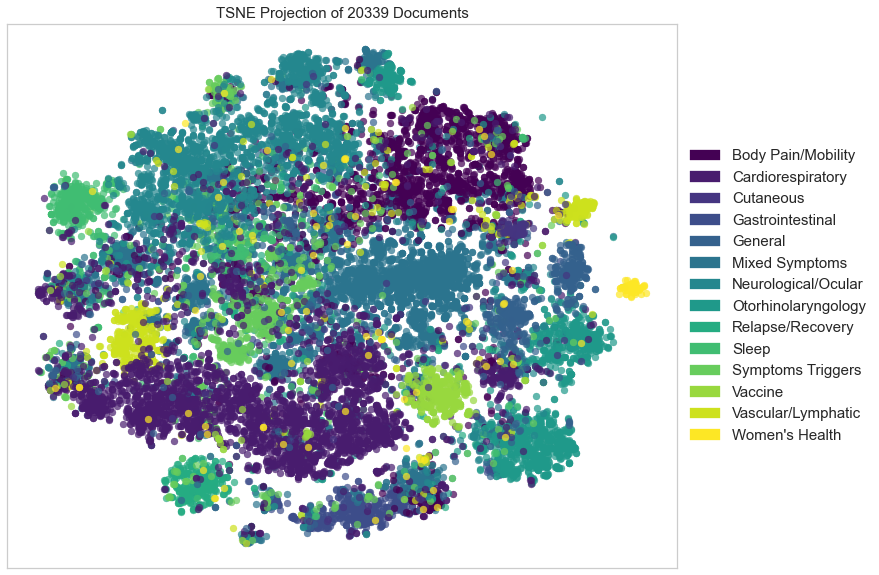

In [34]:
# Selecting the symptom groups (only excluding the unlabeled cluster)
symptom_groups = ['Vascular/Lymphatic', 'Cardiorespiratory','Otorhinolaryngology', 'General', 'Sleep','Neurological/Ocular','Gastrointestinal', 'Cutaneous',"Women's Health", 'Body Pain/Mobility', 'Mixed Symptoms', 'Relapse/Recovery', 'Symptoms Triggers', 'Vaccine']
sub_df_clusters = categorized_clustered_df[categorized_clustered_df.cluster_category.isin(symptom_groups)]
symptoms_groups_index_list = sub_df_clusters.index.to_list()
# Vizualising the symptom cluster groups
tsne_viz(X[symptoms_groups_index_list], sub_df_clusters['cluster_category'].to_list(), colormap='viridis')

### Studying mixed symptoms clusters

In [36]:
import collections
# Defining functions to help analyze clusters or cluster groups individually
def extract_symptoms(df):
    extracted_symptoms = df['extracted_symptoms_lexicon']
    extracted_symptoms_categories = df['extracted_symptoms_categories']
    symptoms_flat = [word for post in extracted_symptoms for word in post]
    symptoms_categories_flat = [word for post in extracted_symptoms_categories for word in post]
    return extracted_symptoms, extracted_symptoms_categories, symptoms_flat, symptoms_categories_flat

def percentage_posts_with_symptoms(extracted_symptoms):
    percentage = len([s for s in extracted_symptoms if s]) / len(extracted_symptoms) * 100
    print("{:.2f}".format(percentage) + "% posts contain at least one symptom from the lexicon")

def top_occurrences(elements_list, number_of_top_elements):
    top_elements = collections.Counter(elements_list).most_common(number_of_top_elements)
    total_elements = len(elements_list)
    top_elements_names = [el[0] for el in top_elements]
    top_elements_percentage = [el[1]/total_elements * 100 for el in top_elements]
    top_elements_dictionary = {k: v for k, v in zip(top_elements_names, top_elements_percentage)}  
    
    return top_elements, top_elements_dictionary

###### Exploring the biggest cluster

In [37]:
biggest_cluster = categorized_clustered_df[categorized_clustered_df['cluster']==15]
symptoms, symptoms_categories, symptoms_flat, symptoms_categories_flat = extract_symptoms(biggest_cluster)
percentage_posts_with_symptoms(symptoms)

59.52% posts contain at least one symptom from the lexicon


In [38]:
len([s for s in symptoms if len(s)>1])

1896

In [39]:
len([s for s in symptoms if len(s)>0])

3423

In [40]:
top_symptoms, top_symptoms_dictionary = top_occurrences(symptoms_flat, 10)
top_symptoms_dictionary

{'fatigue': 10.895310279488395,
 'anxiety': 8.088583609663665,
 'pain': 5.02131691141639,
 'depression': 4.843675982946471,
 'suffering': 3.7067740407389858,
 'headaches': 3.138323069635244,
 'clouded consciousness': 2.984367598294647,
 'dizziness or vertigo': 2.9014684983420183,
 'stress': 2.8185693983893887,
 'fever': 2.4277593557555663}

In [41]:
top_symptoms_categories, top_symptoms_categories_dictionary = top_occurrences(symptoms_categories_flat, 10)
top_symptoms_categories_dictionary

{'Mental Health/Psychological/Behavioral': 23.952278984398898,
 'General': 20.75558274701744,
 'Neurological/Ocular ': 14.469256653410827,
 'Body Pain/Mobility': 10.981951667176507,
 'Cardiorespiratory': 9.375955949831754,
 'Gastrointestinal': 7.096971550933007,
 'Otorhinolaryngology': 4.726215968185989,
 'Cutaneous': 3.303762618537779,
 'Sleep': 2.7531355154481494,
 'Vascular/Lymphatic': 1.3612725604160294}

In [42]:
biggest_cluster

level_0  index                       _id  \
1            1      1  62d6699037075c826c2d1c0c   
3            4      4  62d6699037075c826c2d1c0f   
5            7      7  62d6699037075c826c2d1c12   
10          13     13  62d6699037075c826c2d1c18   
13          16     16  62d6699037075c826c2d1c1b   
...        ...    ...                       ...   
20324    26422  27190  62d6bf9037075c826c2d8641   
20327    26428  27197  62d6bf9037075c826c2d8648   
20331    26434  27203  62d6bf9037075c826c2d864e   
20334    26437  27207  62d6bf9037075c826c2d8652   
20335    26438  27208  62d6bf9037075c826c2d8653   

                                                   title  \
1                   Has anyone gotten worse at 8 months?   
3                                               Timeline   
5                                          I’m so bored!   
10     Felt “good” yesterday so got caught up on negl...   
13                                 Worried about booster   
...                                                  ...   
20324                                     GP experiences   
20327                       Long Covid financial support   
20331                            Glad to find a UK page.   
20334                           Anyone else suspect CCI?   
20335  Recommendation for best OTC antihistamine for ...   

                                                selftext  \
1       Have any of you gotten worse at around 8 months?   
3      I looked back at my records since i've been si...   
5      That’s it really. I’m absolutely bored out of ...   
10     Anyone else feel like this when maybe overdoin...   
13     Had 2 doses April 2021, then Breakthrough infe...   
...                                                  ...   
20324  Hi everyone.\n\nWas hoping you could share how...   
20327  Is anyone aware of any financial support avail...   
20331  To the person who set this up - thank you. \n\...   
20334  I'm interested to see if anyone else suspects ...   
20335  I'm struggling with fatigue and crazy levels o...   

                                         titled_selftext  \
1      Has anyone gotten worse at 8 months? Have any ...   
3      Timeline I looked back at my records since i'v...   
5      I’m so bored! That’s it really. I’m absolutely...   
10     Felt “good” yesterday so got caught up on negl...   
13     Worried about booster Had 2 doses April 2021, ...   
...                                                  ...   
20324  GP experiences Hi everyone.\n\nWas hoping you ...   
20327  Long Covid financial support Is anyone aware o...   
20331  Glad to find a UK page. To the person who set ...   
20334  Anyone else suspect CCI? I'm interested to see...   
20335  Recommendation for best OTC antihistamine for ...   

       long_covid_related_text_unstemmed_without_numbers  \
1           anyone gotten worse month worse around month   
3      timeline look back record since sick august si...   
5                                 year worst life boring   
10     felt good yesterday catch neglect housework la...   
13     worry booster dos april breakthrough infection...   
...                                                  ...   
20324  anyone gp actually believe long covid mine swa...   
20327  long covid financial support anyone aware fina...   
20331  nh nurse tired time unwell lc symptom return c...   
20334  anyone else suspect cci interested anyone else...   
20335  recommendation best otc antihistamine long cov...   

                      long_covid_text_without_stop_words  cluster  \
1                                                 gotten       15   
3                                        timeline record       15   
5                                                 boring       15   
10             neglect housework laundry hungover overdo       15   
13     booster dos breakthrough crappy debate booster...       15   
...                                                  ...      ...   
20324    gp mine sway anxie

In [43]:
# Some basic statistics on the obtained clusters
print("Average cluster wordcount: " + str(np.mean(biggest_cluster['selftext_wordcount'])))
print("Average total wordcount: " + str(np.mean(categorized_clustered_df['selftext_wordcount'])))

Average cluster wordcount: 147.8605459920014
Average total wordcount: 161.3311209439528


###### Exploring the mixed symptoms clusters

In [44]:
mixed_symptoms_clusters = categorized_clustered_df[categorized_clustered_df.cluster_category.isin(['Mixed Symptoms'])]
symptoms, symptoms_categories, symptoms_flat, symptoms_categories_flat = extract_symptoms(mixed_symptoms_clusters)
percentage_posts_with_symptoms(symptoms)

60.67% posts contain at least one symptom from the lexicon


In [48]:
top_symptoms, top_symptoms_dictionary = top_occurrences(symptoms_flat, 10)
top_symptoms_dictionary

{'fatigue': 10.71188717259906,
 'anxiety': 7.8464293709424675,
 'pain': 4.801880456682337,
 'depression': 4.745914483993731,
 'suffering': 3.5706290575330204,
 'headaches': 3.212446832325946,
 'clouded consciousness': 3.066935303335572,
 'dizziness or vertigo': 2.921423774345198,
 'stress': 2.719946272666219,
 'tinnitus': 2.384150436534587}

In [49]:
top_symptoms_categories, top_symptoms_categories_dictionary = top_occurrences(symptoms_categories_flat, 10)
top_symptoms_categories_dictionary

{'Mental Health/Psychological/Behavioral': 23.176521363832542,
 'General': 20.155373327578765,
 'Neurological/Ocular ': 14.443964897137102,
 'Body Pain/Mobility': 10.789814415192058,
 'Cardiorespiratory': 9.13537620486261,
 'Gastrointestinal': 6.833549129621637,
 'Otorhinolaryngology': 6.804776291181125,
 'Cutaneous': 3.1793986476765936,
 'Sleep': 2.977988778593008,
 'Vascular/Lymphatic': 1.3379369874838154}

###### Triggered symptoms  clusters

In [50]:
triggered_symptoms_clusters = categorized_clustered_df[categorized_clustered_df.cluster_category.isin(['Symptoms Triggers'])]
symptoms, symptoms_categories, symptoms_flat, symptoms_categories_flat = extract_symptoms(triggered_symptoms_clusters)
percentage_posts_with_symptoms(symptoms)

83.55% posts contain at least one symptom from the lexicon


In [51]:
top_symptoms, top_symptoms_dictionary = top_occurrences(symptoms_flat, 10)
top_symptoms_dictionary

{'fatigue': 15.967113803548246,
 'dizziness or vertigo': 9.303331890956295,
 'clouded consciousness': 6.317611423626136,
 'anxiety': 4.54348766767633,
 'headaches': 4.197317178710515,
 'palpitations': 3.937689311986153,
 'pain': 3.851146689744699,
 'depression': 2.5097360450021635,
 'nausea and/or vomiting': 2.4231934227607095,
 'shortness of breath': 2.250108178277802}

In [52]:
top_symptoms_categories, top_symptoms_categories_dictionary = top_occurrences(symptoms_categories_flat, 10)
top_symptoms_categories_dictionary

{'General': 26.114285714285714,
 'Neurological/Ocular ': 22.457142857142856,
 'Mental Health/Psychological/Behavioral': 14.000000000000002,
 'Cardiorespiratory': 11.257142857142858,
 'Body Pain/Mobility': 9.714285714285714,
 'Gastrointestinal': 6.114285714285715,
 'Otorhinolaryngology': 4.3999999999999995,
 'Sleep': 2.8000000000000003,
 'Cutaneous': 1.8285714285714287,
 'Vascular/Lymphatic': 0.6285714285714286}

###### Analysis of the cluster groups

In [54]:
for sg in group_labels:
    print('Group Label: ' + sg)
    group_clusters = categorized_clustered_df[categorized_clustered_df.cluster_category.isin([sg])]
    symptoms, symptoms_categories, symptoms_flat, symptoms_categories_flat = extract_symptoms(group_clusters)
    percentage_posts_with_symptoms(symptoms)
    _, top_symptoms_dictionary = top_occurrences(symptoms_flat, 5)
    print(top_symptoms_dictionary)
    _, top_symptoms_categories_dictionary = top_occurrences(symptoms_categories_flat, 10)
    print(top_symptoms_categories_dictionary, end='\n\n\n\n\n\n\n\n')


Group Label: Vascular/Lymphatic
68.22% posts contain at least one symptom from the lexicon
{'swelling': 9.045226130653267, 'fatigue': 8.327351040918881, 'pain': 7.896625987078249, 'anxiety': 5.455850681981335, 'headaches': 4.666188083273511}
{'General': 16.682286785379567, 'Body Pain/Mobility': 15.089034676663543, 'Neurological/Ocular ': 14.526710402999063, 'Cardiorespiratory': 12.46485473289597, 'Mental Health/Psychological/Behavioral': 12.277413308341144, 'Vascular/Lymphatic': 12.089971883786317, 'Gastrointestinal': 5.435801312089971, 'Cutaneous': 5.154639175257731, 'Otorhinolaryngology': 3.936269915651359, 'Sleep': 1.499531396438613}







Group Label: Cardiorespiratory
86.55% posts contain at least one symptom from the lexicon
{'palpitations': 7.611434529498654, 'chest pain': 7.194369623772699, 'fatigue': 7.072725692935963, 'anxiety': 6.1777739160656875, 'pain': 5.595620818489878}
{'Cardiorespiratory': 27.243954931003923, 'General': 16.331181162172427, 'Mental Health/Psychological